# Maximum Likelihood Formulation


$P(K|r) = \prod_{f} P(K_f|r)  $    ***We want to find the region $r$ that maximizes P(K).***

$P(K_f|r) = \sum_{g_m,g_p \epsilon G} P(g_p|k_p)P(g_m|k_m) \prod_{c}P(k_{c}|g_{phase}(g_{p}, g_{m})) $  Expression for likelihood of family k-mer distribution.

$P(g_i|k) = \frac{P(k|g_i)}{\sum_{g_i\epsilon G} P(k|g_i)}  $  

Convert to log probability.

$log(P(K|r)) =  \sum_{fams}  \left ( log \sum_{g_{m_f}}\sum_{g_{p_f}} \prod_{c_f} P(k_{c_f}|g_p,g_m) - log \sum_{g_{p_f}} P(k_{p_f}|g_{p_f}) -  log \sum_{g_{m_f}} P(k_{m_f}|g_{m_f}) \right )$

$G = \left \{ 0/0,0/1,1/0,1/1 \right \}  $  Set of possible phased genotypes for k-mer.

$K$ = Distribution of a k-mer 

$r$ = region 

$f$ = family 

$c$ = children 

$g$ = phased genotype of k-mer 

$G$ = set of possible phased genotypes 

$g_{phase}$ = Phasing dictionary from Kelley's algorithm 

In [3]:
from scipy.stats import poisson
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
from Bio import SeqIO

# Test pipeline on a few k-mers.

In [4]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import json

PHASINGS_DIR='/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/'
BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'
KMER_COUNTS_FILE = '/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/ground_truth/sample_kmer_matrix/kmers.filt.tsv'
KMERS_FILE = '/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/ground_truth/sample_kmer_matrix/known_alt_haplotype_kmers_filt.txt'

# Load coordinates for ground truth k-mers.

# Load phasings/haplotype information

In [5]:
# Load in family region/global region conversion data.
fam_region_to_idx = np.load(PHASINGS_DIR +  'fam_region_to_idx.npy', allow_pickle=True).item()
idx_to_fam_region = np.load(PHASINGS_DIR +  'idx_to_fam_region.npy', allow_pickle=True).item()
global_region_to_idx = np.load(PHASINGS_DIR +  'global_region_to_idx.npy', allow_pickle=True).item()
idx_to_global_region = np.load(PHASINGS_DIR +  'idx_to_global_region.npy', allow_pickle=True).item()
fam_region_to_global_region = np.load(PHASINGS_DIR + 'fam_regions_to_global_regions.npy', allow_pickle=True)
family_info = pd.read_pickle(PHASINGS_DIR + 'fam_list.df')
global_region_to_fam_region = np.load(PHASINGS_DIR + 'global_region_to_fam_regions.npy', allow_pickle=True)


# Info from BAM mappings.
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']
sample_id_to_participant = {sample_id:participant_id for participant_id, sample_id in zip(bam_mappings.participant_id, bam_mappings.index)}

In [70]:
import numpy as np

fam_region_to_idx = np.load(PHASINGS_DIR +  'fam_region_to_idx.npy', allow_pickle=True).item()
idx_to_fam_region = np.load(PHASINGS_DIR +  'idx_to_fam_region.npy', allow_pickle=True).item()
global_region_to_idx = np.load(PHASINGS_DIR +  'global_region_to_idx.npy', allow_pickle=True).item()
idx_to_global_region = np.load(PHASINGS_DIR +  'idx_to_global_region.npy', allow_pickle=True).item()
fam_region_to_global_region = np.load(PHASINGS_DIR + 'fam_regions_to_global_regions.npy', allow_pickle=True)
family_info = pd.read_pickle(PHASINGS_DIR + 'fam_list.df')


for i,global_regions in enumerate(fam_region_to_global_region):
    if idx_to_global_region[global_regions[0]][:2]!=idx_to_global_region[global_regions[-1]][:2]:
        print(idx_to_global_region[global_regions[0]], idx_to_global_region[global_regions[-1]])
    if idx_to_global_region[global_regions[0]][:2]!=idx_to_fam_region[i][:2]:
        print(i,idx_to_global_region[global_regions[0]], idx_to_fam_region[i])
        break

In [77]:
global_region_to_fam_region = [[] for i in idx_to_global_region]
for f, global_regions in enumerate(fam_region_to_global_region):
    for g in global_regions:
        global_region_to_fam_region[g] = global_region_to_fam_region[g] + [f]
np.save(PHASINGS_DIR + 'global_region_to_fam_regions.npy', global_region_to_fam_region)

TypeError: save() missing 1 required positional argument: 'arr'

In [78]:
np.save(PHASINGS_DIR + 'global_region_to_fam_regions.npy', global_region_to_fam_region)

In [95]:
for i,global_regions in enumerate(fam_region_to_global_region):
    if idx_to_global_region[global_regions[0]][:2]!=idx_to_global_region[global_regions[-1]][:2]:
        print(idx_to_global_region[global_regions[0]], idx_to_global_region[global_regions[-1]])
    if idx_to_global_region[global_regions[0]][:2]!=idx_to_fam_region[i][:2]:
        print(i,idx_to_global_region[global_regions[0]], idx_to_fam_region[i])
        break

134617 10.000000001.000080882 0X.000000001.000118332


In [99]:
A='01'
for i in idx_to_fam_region:
    if A!=idx_to_fam_region[i][:2]: print(A)
    A = idx_to_fam_region[i][:2]

01
02
03
04
05
06
07
08
09
0X
10
11
12
13
14
15
16
17
18
19
20
21


In [102]:
sorted(['21', '10', '2X'])

['10', '21', '2X']

In [87]:
for i,fam_regions in enumerate(global_region_to_fam_region):
    if idx_to_fam_region[fam_regions[0]][:2]!=idx_to_fam_region[fam_regions[-1]][:2]:
        print(idx_to_fam_region[fam_regions[0]], idx_to_fam_region[fam_regions[-1]])
    if idx_to_fam_region[fam_regions[0]][:2]!=idx_to_global_region

21.041655528.042307574 22.000000001.010961625
21.041958777.042764270 22.000000001.011976157
21.042333584.042344799 22.000000001.018080122
21.042764270.046709983 22.010662189.011137755
21.043353933.043377050 22.010699966.011335904
21.044271584.046709983 22.010851906.011782557
21.044688012.046709983 22.011132695.019932428
21.045013275.046709983 22.011268152.026434513
21.045321886.046709983 22.011438746.011809414
21.045497868.046709983 22.011705789.012224005
21.045619875.045953139 22.012028419.021063902
21.046078637.046709983 22.012224005.012509138
21.046111302.046709983 22.012294271.012411482
21.046571890.046581475 22.012423597.016421373
21.046573647.046635445 22.012591242.015154785
21.046574774.046709983 22.012714209.015331660
21.046619115.046709983 22.012817354.023534222
0X.000276171.000788542 10.000000001.001585303
0X.000276171.000788542 10.000000001.002845787
0X.000276171.000788542 10.000000001.003829104
0X.000276171.000788542 10.000000001.006085424
0X.000276171.000788542 10.00000000

In [7]:
A = np.random.choice(list(idx_to_global_region.keys()), 10)
idx_to_global_region[A[0]]

'15.065326194.065326372'

In [8]:
freq=.1
mom_haplotype = (1*(np.random.random()<freq), 1*(np.random.random()<freq))
dad_haplotype = (1*(np.random.random()<freq), 1*(np.random.random()<freq))

In [12]:
fams_included = [i.replace('.txt', '').split('/')[-1] for i in glob(
    '/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/phased_fams/*.txt')]
if True:
    for fam in list(fams_included)[:20]:  
        print(fam)
        global_likelihood = np.zeros(len(global_region_to_idx)) 
        # Extract mom, dad, and child sample_ids.
        children = family_info.loc[fam].sib_samples
        mom = family_info.loc[fam].mother_sample
        dad = family_info.loc[fam].father_sample
        phased_fam = pd.read_csv('/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/phased_fams/%s.txt' % fam,
                                 sep='\t')

        # Set up phasing dataframe.
        for ch in children:
            phased_fam[ch] = [(m,d-2) for m,d in zip(phased_fam[sample_id_to_participant[ch]+'_mat'], phased_fam[sample_id_to_participant[ch]+'_pat'])]
        phased_fam.index = ['%s.%09d.%09d' % (('0' + chrom[3:])[-2:], start, end) for chrom, start, end in phased_fam[['chrom', 'start_pos', 'end_pos']].values]
        phased_fam = phased_fam[children]
        break
        
        
        

AU1512


In [75]:
global_idx = A[0]
fam_regions = global_region_to_fam_region[global_idx]
#fam_idxs = [fam_region_to_idx[i] for i in phased_fam.index] #[fam_regions
#fam_regions = [i for i in phased_fam.index if fam_region_to_idx[i] in fam_idxs]


In [76]:
fam_regions

[]

In [ ]:
# Load in k-mer counts.
kmer_counts = pd.read_table(KMER_COUNTS_FILE, header=None, index_col=0, nrows=100000)
kmer_names = pd.read_table(KMERS_FILE, header=None, index_col=0, nrows=100000)
kmer_counts.index = [(i,j) for i,j in zip(kmer_names.index, kmer_names[1])]
kmer_counts.columns = bam_mappings.index
kmer_counts = kmer_counts[((kmer_counts>0).mean(axis=1)>.05) & ((kmer_counts>0).mean(axis=1)<.1)]
#kmer_names = kmer_names.loc[kmer_counts.index]

In [584]:
family_log_likelihood(7, 14, [14, 7, 14], [(1, 1), (0, 1), (1, 1)])

-10.375200283320762

In [589]:
family_log_likelihood(7, 14, [14, 7, 14], [(1, 1), (0, 1), (1, 1)])

-12.9522510830862

In [591]:
families_in_file = [i.replace('.txt', '').split('/')[-1] for i in glob(
    '/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/phased_fams/*.txt')]
for k in kmer_counts.iterrows():
    if k[0][1][3]=='1': continue
    print(k[0])
    global_likelihoods = [] #np.zeros(len(global_region_to_idx)) 
    fams_included = set(bam_mappings.loc[kmer_counts.columns[k[1]>0]].family).intersection(family_info.index).intersection(families_in_file)
    for fam in list(fams_included)[:20]:  
        print(fam)
        global_likelihood = np.zeros(len(global_region_to_idx)) 
        # Extract mom, dad, and child sample_ids.
        children = family_info.loc[fam].sib_samples
        mom = family_info.loc[fam].mother_sample
        dad = family_info.loc[fam].father_sample
        phased_fam = pd.read_csv('/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/phased_fams/%s.txt' % fam,
                                 sep='\t')

        # Set up phasing dataframe.
        for ch in children:
            phased_fam[ch] = [(m,d-2) for m,d in zip(phased_fam[sample_id_to_participant[ch]+'_mat'], phased_fam[sample_id_to_participant[ch]+'_pat'])]
        phased_fam.index = ['%s.%09d.%09d' % (('0' + chrom[3:])[-2:], start, end) for chrom, start, end in phased_fam[['chrom', 'start_pos', 'end_pos']].values]
        #phased_fam = phased_fam[children]

        # Compute family likelihood.
        fam_likelihood = [family_log_likelihood(k[1][mom], k[1][dad], k[1][children], phased_fam[children].iloc[i]) for i in range(len(phased_fam))]

        # Convert family likelihood region to global region. 
        for i,l in enumerate(fam_likelihood):
            global_idxs = fam_region_to_global_region[fam_region_to_idx[phased_fam.index[i]]]
            global_likelihood[global_idxs] =  l
        global_likelihood[global_likelihood==0] = np.mean(global_likelihood[global_likelihood!=0])
        global_likelihoods = global_likelihoods + [global_likelihood]
    
    final_likelihood = np.array(global_likelihoods).sum(axis=0)
    print([idx_to_global_region[i] for i in np.argsort(final_likelihood)[::-1][:10]])
    break

('ATCCATCTATCATTTATCTATATGGTATATATCTATTAATCATCTATTTATTCATTTATTATCTATCTAGCCATCATCTATCATTTATCGATTATCCATC', 'chr2_KI270770v1_alt')
AU2052
AU1215
AU3900
AU1529
AU3790
AU0930
AU1182
AU1905
AU1708
AU1923
AU1002
AU3649
AU2312
AU0311
AU2557
AU0995
AU1369
AU1171
AU1655
AU1394
['05.178191940.178193729', '05.178270175.178281502', '05.178286190.178335640', '05.178335640.178339968', '05.178339968.178343666', '05.178343666.178351038', '05.178351038.178352994', '05.178355268.178355536', '05.178352994.178355268', '05.178109243.178112588']


In [573]:
min(fam_likelihood)

-19.934039070430266

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])


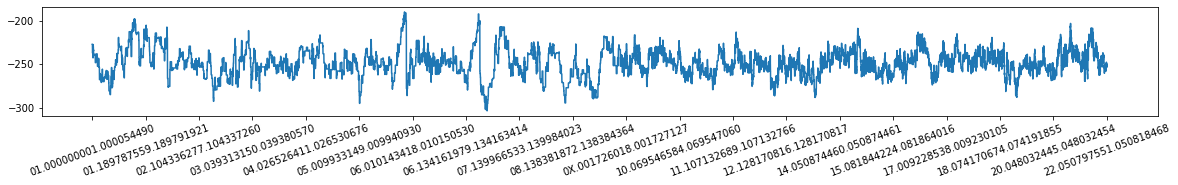

In [592]:
plt.figure(figsize=(20,2))
print(plt.xticks())
prob = 2**final_likelihood
prob=prob/sum(prob)
plt.plot(final_likelihood)
ticks = np.linspace(0,len(final_likelihood)-1, num=20)
label = [idx_to_global_region[int(aa)] for aa in ticks]
plt.xticks(ticks, label,rotation=20)
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])


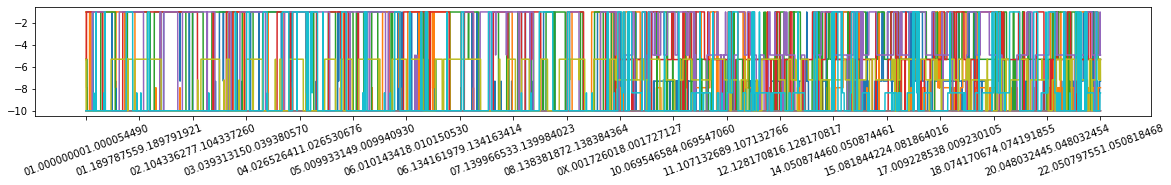

In [578]:
plt.figure(figsize=(20,2))
print(plt.xticks())
prob = 2**final_likelihood
prob=prob/sum(prob)
for g in global_likelihoods:
    plt.plot(g)
ticks = np.linspace(0,len(final_likelihood)-1, num=20)
label = [idx_to_global_region[int(aa)] for aa in ticks]
plt.xticks(ticks, label,rotation=20)
plt.show()

# OLD METHOD

In [18]:
######### Come up with possible phasings that correspond to k-mers #######

df_all = kmer_counts[np.append(children, [mom, dad])].copy()
df_all[pd.isna(df_all)] = 0
df_all = df_all>0

# Impossible inheritance patterns, kmer is something weird.
df_impossible = df_all[(df_all[mom]==False) & (df_all[dad]==False)] 
df_all = df_all[(df_all[mom]==True) | (df_all[dad]==True)]

# Unclassifieable: Kmer is in all siblings, so parent could be homozygous kmer.
df_unclassifiable = df_all[(df_all[children]).sum(axis=1)==len(children)]
df_all = df_all[(df_all[children]).sum(axis=1)!=len(children)]

df_all['kmer'] = df_all.index


### Perform aggregation to get sets of sibs with shared maternal/paternal k-mer ####
### Final index is {sibs_with_kmer, sibs_without_kmer}, value is kmers.
# Extract maternally inherited, paternally inherited, and either inherited
df_mat = df_all[(df_all[mom]==True) & (df_all[dad]==False)].drop([mom, dad], axis=1)
df_pat = df_all[(df_all[mom]==False) & (df_all[dad]==True)].drop([mom, dad], axis=1)
df_both = df_all[(df_all[mom]==True) & (df_all[dad]==True)].drop([mom, dad], axis=1)

# Compute sib sets for maternally inherited.
df_mat=df_mat.groupby(list(children)).aggregate(list) 
df_mat['sets'] = [frozenset([frozenset(children[np.where(np.array(i)==True)[0]]), frozenset(children[np.where(np.array(i)==False)[0]])]) for i in df_mat.index]
df_mat = df_mat.groupby('sets').aggregate(lambda x: list(x))
df_mat['kmer'] = [set(np.concatenate(k)) for k in df_mat['kmer']]
df_mat['n_kmers'] = [len(k) for k in df_mat.kmer]

# Compute sib sets for paternally inherited: 
df_pat=df_pat.groupby(list(children)).aggregate(list)
df_pat['sets'] = [frozenset([frozenset(children[np.where(np.array(i)==True)[0]]), frozenset(children[np.where(np.array(i)==False)[0]])]) for i in df_pat.index]
df_pat = df_pat.groupby('sets').aggregate(lambda x: list(x))
df_pat['kmer'] = [set(np.concatenate(k)) for k in df_pat['kmer']]
df_pat['n_kmers'] = [len(k) for k in df_pat.kmer]

# Compute sib sets for both.  This has a slightly different structure: Index is [{sibs_with_kmer}, {sibs_without_kmer}]
df_both=df_both.groupby(list(children)).aggregate(list)
df_both['sets'] = [(frozenset(children[np.where(np.array(i)==True)[0]]), frozenset(children[np.where(np.array(i)==False)[0]])) for i in df_both.index]
df_both = df_both.groupby('sets').aggregate(lambda x: list(x))
df_both['kmer'] = [set(np.concatenate(k)) for k in df_both['kmer']]
df_both['n_kmers'] = [len(k) for k in df_both.kmer]

df_mat = df_mat.sort_values('n_kmers', ascending=False)
df_pat = df_pat.sort_values('n_kmers', ascending=False)
df_both = df_both.sort_values('n_kmers', ascending=False)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
[frozenset([frozenset(children[np.where(np.array(i)==True)[0]]), frozenset(children[np.where(np.array(i)==False)[0]])]) for i in df_mat.index]


# Phasing

In [37]:
phased_fam = pd.read_csv('/oak/stanford/groups/dpwall/users/kpaskov/PhasingFamilies/phased_ihart/%s.phased.txt' % fam, sep='\t')
phased_fam['region'] = ['%s.%i.%i' % (chrom.replace('chr', ''), int(i),int(j)) for chrom,i,j in zip(phased_fam.chrom, phased_fam.start_pos, phased_fam.end_pos)]
phased_fam.drop([mom+'_mat', dad + '_mat', mom + '_pat', dad + '_pat'], axis=1, inplace=True)
# Get phased groupings
for i in children:
    phased_fam[i] = [(i,j) for i,j in zip(phased_fam[i+'_mat'].replace(np.nan,-1), phased_fam[i+ '_pat'].replace(np.nan,-1))]
    
# Phased from mat groupings
phased_fam_mat = phased_fam[[s for s in phased_fam.columns if 'mat' in s] + ['region']].groupby([s for s in phased_fam.columns if 'mat' in s]).aggregate(list)
phased_fam_mat['sets'] = [(frozenset(children[np.where(np.array(i)==0)[0]]), frozenset(children[np.where(np.array(i)==1)[0]])) for i in phased_fam_mat.index]
phased_fam_mat = phased_fam_mat.groupby('sets').aggregate(list)
phased_fam_mat['region'] = [[i for j in k for i in j] for k in phased_fam_mat['region']]

# Phased fam pat
phased_fam_pat = phased_fam[[s for s in phased_fam.columns if 'pat' in s] + ['region']].groupby([s for s in phased_fam.columns if 'pat' in s]).aggregate(list)
phased_fam_pat['sets'] = [(frozenset(children[np.where(np.array(i)==2)[0]]), frozenset(children[np.where(np.array(i)==3)[0]])) for i in phased_fam_pat.index]
phased_fam_pat = phased_fam_pat.groupby('sets').aggregate(list)
phased_fam_pat['region'] = [[i for j in k for i in j] for k in phased_fam_pat['region']]

# Phased fam both
phased_fam_both = phased_fam[list(children) + ['region']].groupby(list(children)).aggregate(list)


# Process regions/kmers inherited from both/either parent. 
sample_name_to_num = {j:i for i,j in enumerate(phased_fam_both.index.names)}
possible_regions_both = [[] for i in df_both.index]
for i_kmer,child_with_kmer_index in enumerate(df_both.index):
    possible_regions_ = []
    
    # Edge case where both parents have k-mer and no children do.
    if len(child_with_kmer_index[0])==0:
        for phased_fam_index,region in zip(phased_fam_both.index, phased_fam_both.region):
            if (((1.0 not in {float(i[0]) for i in phased_fam_index}) or  (0.0 not in {float(i[0]) for i in phased_fam_index})) &
                ((2.0 not in {float(i[1]) for i in phased_fam_index}) or  (3.0 not in {float(i[1]) for i in phased_fam_index}))):
                possible_regions_ = possible_regions_ + region
                
    for phased_fam_index,region in zip(phased_fam_both.index, phased_fam_both.region):
        if sum([phased_fam_index[sample_name_to_num[has_kmer]]==phased_fam_index[sample_name_to_num[no_kmer]] for has_kmer in child_with_kmer_index[0] for no_kmer in child_with_kmer_index[1]])==0:
            possible_regions_ = possible_regions_ + region
    possible_regions_both[i_kmer] = possible_regions_
    
# Process regions/kmers inherited from mom.
sample_name_to_num = {j:i for i,j in enumerate(phased_fam_mat.index.names)}
possible_regions_mat = [[] for i in df_mat.index]
for i_kmer,child_with_kmer_index in enumerate(df_mat.index):
    possible_regions_ = []
    child_kmer_sets = list(child_with_kmer_index)
    children_with_kmer = child_kmer_sets[0]
    children_without_kmer = child_kmer_sets[1]
    for phased_fam_index,region in zip(phased_fam_mat.index, phased_fam_mat.region):
        child_set_1 = phased_fam_index[0]
        child_set_2 = phased_fam_index[1]
        if (
            (len(child_set_1.difference(children_with_kmer))==0) & (len(child_set_2.difference(children_without_kmer))==0)
        ) or (
            (len(child_set_2.difference(children_with_kmer))==0) & (len(child_set_1.difference(children_without_kmer))==0)
        ):
            possible_regions_ = possible_regions_ + region
    possible_regions_mat[i_kmer] = possible_regions_
    
# Process regions/kmers inherited from dad.
sample_name_to_num = {j:i for i,j in enumerate(phased_fam_pat.index.names)}
possible_regions_pat = [[] for i in df_pat.index]
for i_kmer,child_with_kmer_index in enumerate(df_pat.index):
    possible_regions_ = []
    child_kmer_sets = list(child_with_kmer_index)
    children_with_kmer = child_kmer_sets[0]
    children_without_kmer = child_kmer_sets[1]
    for phased_fam_index,region in zip(phased_fam_pat.index, phased_fam_pat.region):
        child_set_1 = phased_fam_index[0]
        child_set_2 = phased_fam_index[1]
        if (
            (len(child_set_1.difference(children_with_kmer))==0) & (len(child_set_2.difference(children_without_kmer))==0)
        ) or (
            (len(child_set_2.difference(children_with_kmer))==0) & (len(child_set_1.difference(children_without_kmer))==0)
        ):
            possible_regions_ = possible_regions_ + region
    possible_regions_pat[i_kmer] = possible_regions_
    
    
    
##### Create family vote matrix #####
family_vote = pd.DataFrame(np.zeros((len(kmer_counts), len(phased_fam.region)+2)))
family_vote.columns = list(phased_fam.region) + ['impossible', 'ambigious']
family_vote.index = kmer_counts.index
family_vote.loc[df_impossible.index,'impossible']=1
family_vote.loc[df_unclassifiable.index,'ambigious']=1
for i in range(len(df_pat)):
    family_vote.loc[df_pat.iloc[i].kmer, possible_regions_pat[i]] = 1
for i in range(len(df_mat)):
    family_vote.loc[df_mat.iloc[i].kmer, possible_regions_mat[i]] = 1
for i in range(len(df_both)):
    family_vote.loc[df_both.iloc[i].kmer, possible_regions_both[i]] = 1

# Match phasings to kmers

In [41]:
global_vote = np.zeros((len(kmer_counts), len(global_region_to_idx)))
global_vote

In [47]:
len(fam_region_to_idx)

3238440

In [4]:
# Load in family region/global region conversion data.
with open('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/phasings/' + 'fam_regions_to_global_regions_21.json', 'r') as f:
    fam_regions_to_global_regions = json.load(f)

In [59]:
PHASINGS_DIR='/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/'


In [ ]:
# Load in family region/global region conversion data.
fam_region_to_idx = np.load(PHASINGS_DIR +  'fam_region_to_idx.npy', allow_pickle=True).item()
idx_to_fam_region = np.load(PHASINGS_DIR +  'idx_to_fam_region.npy', allow_pickle=True).item()
global_region_to_idx = np.load(PHASINGS_DIR +  'global_region_to_idx.npy', allow_pickle=True).item()
idx_to_global_region = np.load(PHASINGS_DIR +  'idx_to_global_region.npy', allow_pickle=True).item()

fam_region_to_global_region = np.load(PHASINGS_DIR + 'fam_regions_to_global_regions.npy', allow_pickle=True).item()

In [1]:
len(global_region_to_idx)

NameError: name 'global_region_to_idx' is not defined

# Create table/dictionary to convert family region to global region

In [4]:
# Load in phased regions.
import pandas as pd
import numpy as np
import sys
import json
import tqdm
from collections import Counter
FINAL_PHASINGS_DIR='/home/groups/dpwall/briannac/alt_haplotypes/data/phasings'


start_ends = pd.read_pickle(FINAL_PHASINGS_DIR + '/family_regions.df')
family_region_to_global_regions_dict = {}

In [39]:
with open(FINAL_PHASINGS_DIR + '/fam_regions_to_global_regions.json', 'w') as f:
    json.dump(family_region_to_global_regions_dict, f)        
        
# Combine all dictionaries.
#fam_regions_to_global_regions_full_dict = {}
#for chrom in range(22):
#    with open(PHASINGS_DIR + '/fam_regions_to_global_regions_%s.json' % chrom, 'r') as fp:
#        new_dict = json.load(fp)
#    fam_regions_to_global_regions_full_dict.update(new_dict)

#with open(FINAL_PHASINGS_DIR + '/fam_regions_to_global_regions.json', 'w') as f:
#    json.dump(family_region_to_global_regions_dict, f)

In [147]:
print('saving...')
with open(PHASINGS_DIR + '/fam_regions_to_global_regions_%s.json' % chrom, 'w') as f:
    json.dump(family_region_to_global_regions_dict, f)

saving...


In [54]:
mappings = np.load('/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/fam_regions_to_global_regions.npy', allow_pickle=True)